In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from statsforecast import StatsForecast

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
import lightgbm as lgb
import seaborn as sns
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.lag_transforms import RollingMean, RollingStd, ExpandingMean
from sklearn.linear_model import Ridge
import lightgbm as lgb

import numpy as np
import matplotlib.pyplot as plt


In [95]:
dir='data/store-sales-time-series-forecasting'
file='train.csv'
df=pd.read_csv(f'{dir}/{file}')
df.date=pd.to_datetime(df.date)

store_nbr=list(df.store_nbr.unique())[10]
df_store_nbr=df[df['store_nbr']==store_nbr]
family=list(df_store_nbr.family.unique())[2]
df_store_nbr_family=df_store_nbr[df_store_nbr['family']==family]
df_store_nbr_family=df_store_nbr_family.set_index('date')

df_store_nbr_family    
v=df_store_nbr_family['sales'].values


(1680,) (1680,)


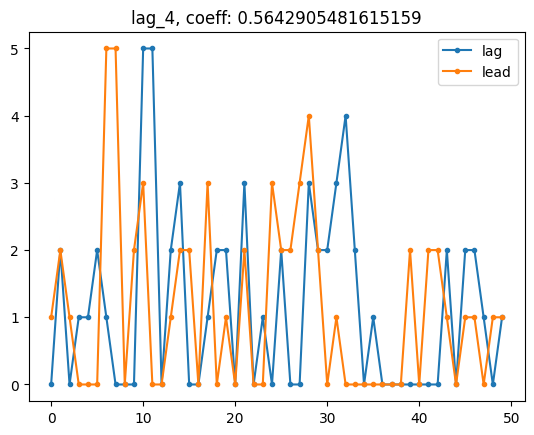

In [96]:

lag_val=4

if lag_val==0:
    lag = v
else:
    lag = v[:-lag_val]
lead = v[lag_val:]

print(lag.shape,lead.shape)

lim=50
plt.plot(lag[:lim],'.-',label='lag')
plt.plot(lead[:lim],'.-',label='lead')
value = np.correlate(lag, lead)[0]
value = value / np.correlate(v, v)[0]

plt.legend()
plt.title(f'lag_{lag_val}, coeff: {value}')
plt.show()

Text(0.5, 1.0, 'ACF Store#19_BEVERAGES')

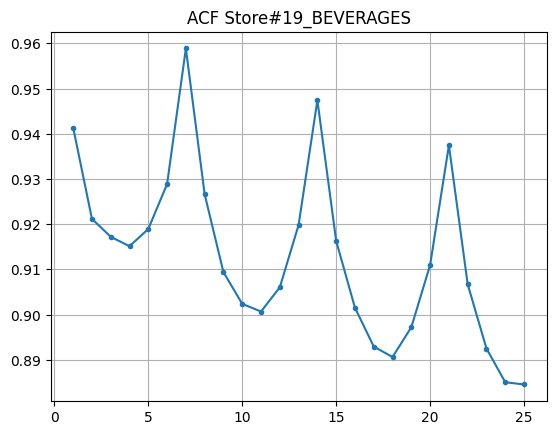

In [93]:

dir='data/store-sales-time-series-forecasting'
file='train.csv'
df=pd.read_csv(f'{dir}/{file}')
df.date=pd.to_datetime(df.date)

store_nbr=list(df.store_nbr.unique())[10]
df_store_nbr=df[df['store_nbr']==store_nbr]
family=list(df_store_nbr.family.unique())[3]
df_store_nbr_family=df_store_nbr[df_store_nbr['family']==family]
df_store_nbr_family=df_store_nbr_family.set_index('date')

df_store_nbr_family    
v=df_store_nbr_family['sales'].values



metric_vals=[]
for lag_val in range(1,100):
    if lag_val==0:
        lag = v
    else:
        lag = v[:-lag_val]
    lead = v[lag_val:]
    value = np.correlate(lag, lead)[0]
    value = value / np.correlate(v, v)[0]
    metric_vals.append(value)



lim=25
plt.plot(list(range(1,100))[:lim],metric_vals[:lim],'.-')
plt.grid(True)
plt.title(f'ACF Store#{store_nbr}_{family}')

## Subplot for presentation

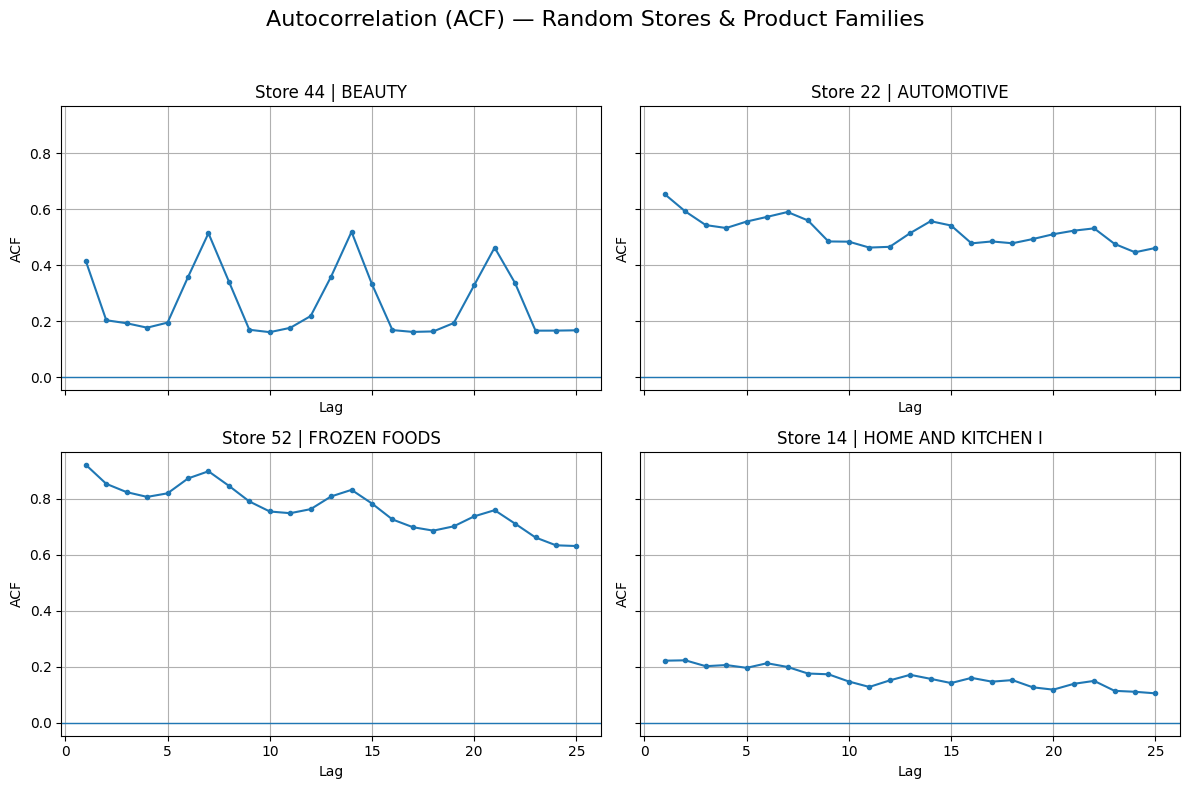

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_acf(v, max_lag=100):
    v = v - np.mean(v)  # demean

    acf_vals = []
    denom = np.correlate(v, v)[0]

    for lag in range(1, max_lag):
        value = np.correlate(v[:-lag], v[lag:])[0]
        acf_vals.append(value / denom)

    return np.array(acf_vals)

#np.random.seed(40)  # reproducibility

# load data
dir = 'data/store-sales-time-series-forecasting'
file = 'train.csv'
df = pd.read_csv(f'{dir}/{file}')
df['date'] = pd.to_datetime(df['date'])

# randomly choose 4 stores
stores = np.random.choice(df['store_nbr'].unique(), size=4, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

max_lag = 100
lim = 25

for ax, store_nbr in zip(axes, stores):

    df_store = df[df['store_nbr'] == store_nbr]

    # randomly choose one family for this store
    family = np.random.choice(df_store['family'].unique())

    df_sf = (
        df_store[df_store['family'] == family]
        .set_index('date')
        .sort_index()
    )

    v = df_sf['sales'].values

    acf_vals = compute_acf(v, max_lag=max_lag)

    ax.plot(range(1, lim + 1), acf_vals[:lim], '.-')
    ax.axhline(0, linewidth=1)
    ax.grid(True)

    ax.set_title(f"Store {store_nbr} | {family}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("ACF")

fig.suptitle("Autocorrelation (ACF) — Random Stores & Product Families", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# PACF

In [109]:
dir='data/store-sales-time-series-forecasting'
file='train.csv'
df=pd.read_csv(f'{dir}/{file}')
df.date=pd.to_datetime(df.date)

store_nbr=list(df.store_nbr.unique())[10]
df_store_nbr=df[df['store_nbr']==store_nbr]
family=list(df_store_nbr.family.unique())[2]
df_store_nbr_family=df_store_nbr[df_store_nbr['family']==family]
df_store_nbr_family=df_store_nbr_family.set_index('date')

df_store_nbr_family    
v=df_store_nbr_family['sales'].values



lag_val=1

if lag_val==0:
    lag = v
else:
    lag = v[:-lag_val]
lead = v[lag_val:]

k = lag_val

# target
y = v[k:]

# predictors: lags 1..k
X = np.column_stack([v[k - i:-i] for i in range(1, k + 1)])

# solve least squares
beta, *_ = np.linalg.lstsq(X, y, rcond=None)

# PACF value = coefficient of lag k
pacf_value = beta[-1]
print(f'Lag {lag_val}: {pacf_value}')

Lag 1: 0.6487953851374296


### Loop for different lag values and calc PACF

Lag 1: 0.6487953851374296
Lag 2: 0.29498185502181173
Lag 3: 0.21649799870449732
Lag 4: 0.16727336934783196
Lag 5: 0.1555630980436703
Lag 6: 0.19138181186367534
Lag 7: 0.20309823924557358
Lag 8: 0.1013484962847827
Lag 9: 0.040722871458022954
Lag 10: 0.022347700156049147
Lag 11: 0.036381751197471154
Lag 12: 0.06721906647400218
Lag 13: 0.07397877140534101
Lag 14: 0.12162936196468467
Lag 15: 0.031424646125461184
Lag 16: -0.003932962822855396
Lag 17: 0.020842393304668198
Lag 18: 0.03916880497148846
Lag 19: -0.04342255672532321
Lag 20: 0.13928484280330822
Lag 21: 0.10897179809745258
Lag 22: 0.007873932116982132
Lag 23: -0.06139661544562265
Lag 24: -0.001006352653872193
Lag 25: 0.022179979449715705
Lag 26: -0.007582881285845633
Lag 27: 0.07270347457331185
Lag 28: 0.0771719183442618
Lag 29: 0.04503872669297244
Lag 30: 0.023265274948980466
Lag 31: 0.023065539317513553
Lag 32: -0.00947924082031458
Lag 33: 0.005834577654555915
Lag 34: 0.011789398484189887
Lag 35: 0.08110247495318099
Lag 36: 0.033

Text(0.5, 1.0, 'PACF Store#19_BEAUTY')

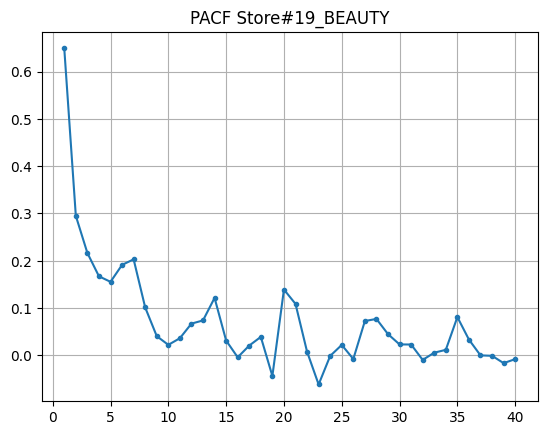

In [108]:
dir='data/store-sales-time-series-forecasting'
file='train.csv'
df=pd.read_csv(f'{dir}/{file}')
df.date=pd.to_datetime(df.date)

store_nbr=list(df.store_nbr.unique())[10]
df_store_nbr=df[df['store_nbr']==store_nbr]
family=list(df_store_nbr.family.unique())[2]
df_store_nbr_family=df_store_nbr[df_store_nbr['family']==family]
df_store_nbr_family=df_store_nbr_family.set_index('date')

df_store_nbr_family    
v=df_store_nbr_family['sales'].values

lag_val=1
metric_vals=[]
for lag_val in range(1,50):

    if lag_val==0:
        lag = v
    else:
        lag = v[:-lag_val]
    lead = v[lag_val:]

    k = lag_val

    # target
    y = v[k:]

    # predictors: lags 1..k
    X = np.column_stack([v[k - i:-i] for i in range(1, k + 1)])

    # solve least squares
    beta, *_ = np.linalg.lstsq(X, y, rcond=None)

    # PACF value = coefficient of lag k
    pacf_value = beta[-1]
    print(f'Lag {lag_val}: {pacf_value}')
    metric_vals.append(pacf_value)



lim=40
plt.plot(list(range(1,100))[:lim],metric_vals[:lim],'.-')
plt.grid(True)
plt.title(f'PACF Store#{store_nbr}_{family}')
    

### Subplot for presentation

Family:LAWN AND GARDEN
Family:MEATS
Family:PREPARED FOODS
Family:HOME AND KITCHEN I


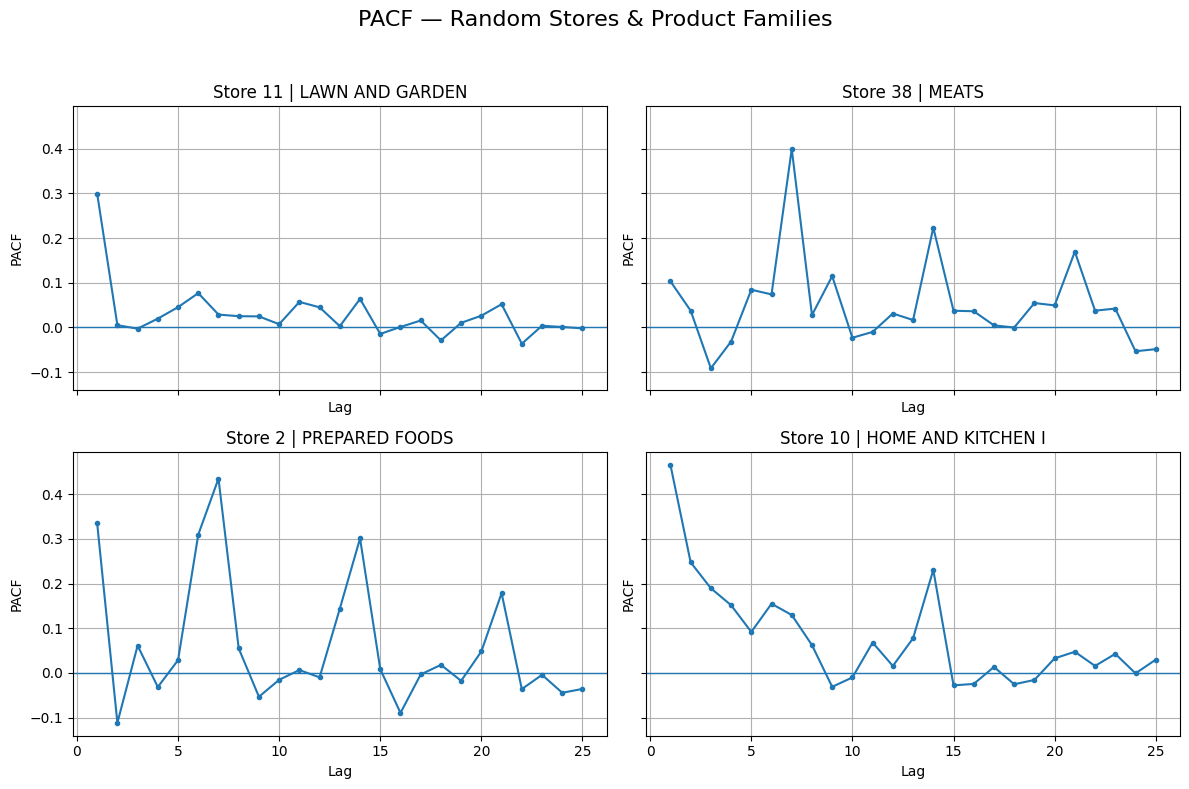

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_pacf(v, max_lag=100):
    v = v - np.mean(v)  # demean

    pacf_vals = []
    denom = np.correlate(v, v)[0]

    for lag in range(1, max_lag):

        k = lag

        # target
        y = v[k:]

        # predictors: lags 1..k
        X = np.column_stack([v[k - i:-i] for i in range(1, k + 1)])

        # solve least squares
        beta, *_ = np.linalg.lstsq(X, y, rcond=None)

        # PACF value = coefficient of lag k
        pacf_value = beta[-1]
        pacf_vals.append(pacf_value)

    return np.array(pacf_vals)

#np.random.seed(40)  # reproducibility

# load data
dir = 'data/store-sales-time-series-forecasting'
file = 'train.csv'
df = pd.read_csv(f'{dir}/{file}')
df['date'] = pd.to_datetime(df['date'])

# randomly choose 4 stores
stores = np.random.choice(df['store_nbr'].unique(), size=4, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

max_lag = 100
lim = 25

for ax, store_nbr in zip(axes, stores):

    df_store = df[df['store_nbr'] == store_nbr]

    # randomly choose one family for this store
    family = np.random.choice(df_store['family'].unique())
    print(f'Family:{family}')

    df_sf = (
        df_store[df_store['family'] == family]
        .set_index('date')
        .sort_index()
    )

    v = df_sf['sales'].values

    acf_vals = compute_pacf(v, max_lag=max_lag)

    ax.plot(range(1, lim + 1), acf_vals[:lim], '.-')
    ax.axhline(0, linewidth=1)
    ax.grid(True)

    ax.set_title(f"Store {store_nbr} | {family}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("PACF")

fig.suptitle("PACF — Random Stores & Product Families", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()